## Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

Dataset: https://github.com/zalandoresearch/fashion-mnist

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* Label	Description
    + 0	T-shirt/top
    + 1	Trouser
    + 2	Pullover
    + 3	Dress
    + 4	Coat
    + 5	Sandal
    + 6	Shirt
    + 7	Sneaker
    + 8	Bag
    + 9	Ankle boot

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Analyzing the dataset

In [4]:
training_images[0].shape

(28, 28)

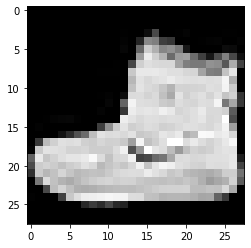

In [5]:
plt.imshow(training_images[0], 'gray')

In [6]:
print('Min: ', min(map(min, training_images[0])))
print('Max: ', max(map(max, training_images[0])))

Min:  0
Max:  255


Random 25 Images from the Training Data:


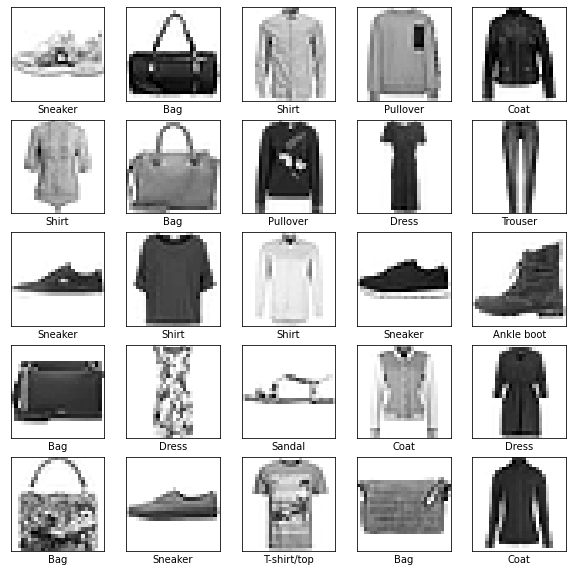

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Random 25 Images from the Training Data:")
plt.figure(figsize=(10, 10))
for i in range(25):
    rand_image_idx = np.random.randint(0, training_labels.shape[0])
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(training_images[rand_image_idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[rand_image_idx]])

Text(0.5, 1.0, 'Test labels frequency')

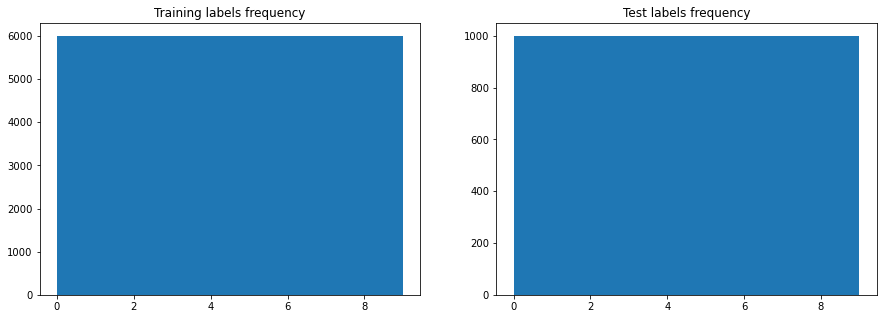

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(training_labels)
plt.title('Training labels frequency')

plt.subplot(1, 2, 2)
plt.hist(test_labels)
plt.title('Test labels frequency')

## Normalizing the images

In [9]:
training_images = training_images/255.0
test_images = test_images/255.0

## Customizing dimensions

* Conv2D expects tensor format i.e., (batch_size, height, width, depth)

In [10]:
# training_images = np.expand_dims(training_images, 3).shape
training_images = training_images.reshape(60000, 28, 28, 1)
training_images.shape

(60000, 28, 28, 1)

In [11]:
# test_images = np.expand_dims(test_images, 3).shape
test_images = test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

## Creating the model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),   # for avoiding overfitting
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])

## Model Summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## Compiling the model

In [14]:
# # customing optimizer
# adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)  # Default parameters

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* categorical_crossentropy => expects that we have one-hot encoded the targets
* sparse_categorical_crossentropy => applies one-hot encoding

## Training the model

In [ ]:
# # custom callback to end training after given condition
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss')<0.4):
#             print("\nLoss is low so cancelling training!")
#             self.model.stop_training = True
            
# early_stopping = myCallback()

In [ ]:
# # This callback will stop the training when there is no improvement in validation loss for two consecutive epochs.
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# # callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model/cp.ckpt',
#                                                  monitor='val_loss',
#                                                  save_weights_only=True,
#                                                  save_best_only=False,
#                                                  save_freq='epoch',
#                                                  verbose=1)

In [16]:
try:
    model.load_weights('cp.h5')
    history = model.history
except:
    # history = model.fit(x=training_images, y=training_labels, epochs=10, callbacks=[early_stopping, cp_callback])
    history = model.fit(x=training_images, y=training_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 832us/sample - loss: 0.5734 - acc: 0.7834
Epoch 2/10
60000/60000 [==============================] - 46s 772us/sample - loss: 0.3558 - acc: 0.8692
Epoch 3/10
60000/60000 [==============================] - 46s 760us/sample - loss: 0.3144 - acc: 0.8837
Epoch 4/10
60000/60000 [==============================] - 47s 780us/sample - loss: 0.2823 - acc: 0.8959
Epoch 5/10
60000/60000 [==============================] - 47s 781us/sample - loss: 0.2585 - acc: 0.9039
Epoch 6/10
60000/60000 [==============================] - 43s 720us/sample - loss: 0.2401 - acc: 0.9107
Epoch 7/10
60000/60000 [==============================] - 45s 747us/sample - loss: 0.2251 - acc: 0.9161
Epoch 8/10
60000/60000 [==============================] - 48s 800us/sample - loss: 0.2108 - acc: 0.9219
Epoch 9/10
60000/60000 [==============================] - 47s 792us/sample - loss: 0.1995 - acc: 0.9258
Epoch 10/10
60000/60000 [================

## Analyzing the trained model

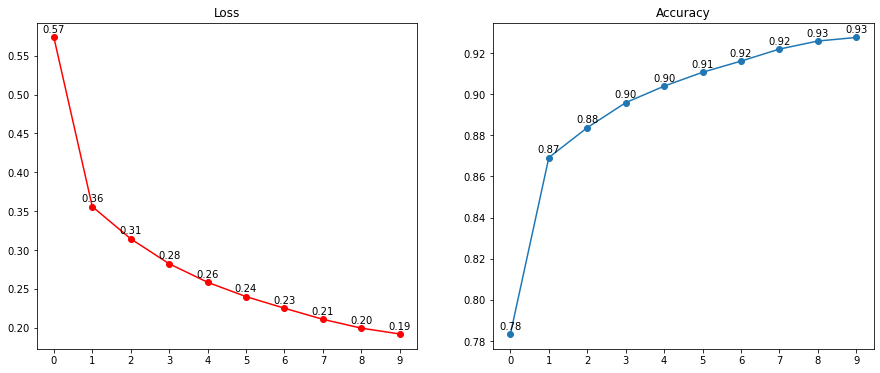

In [36]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', marker='o')
plt.title('Loss')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['loss']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                               # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], marker='o')
plt.title('Accuracy')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['acc']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                               # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

## Visualizing intermediate activations

## Testing the model

In [18]:
# outputs based on model
pred1 = model.predict(test_images)
pred1

array([[3.49669356e-11, 1.30544125e-14, 8.81537776e-09, ...,
        9.50512986e-05, 1.68681486e-12, 9.76252735e-01],
       [5.51199591e-05, 5.59252460e-13, 9.63104665e-01, ...,
        1.19622562e-10, 5.16668237e-08, 2.42876552e-10],
       [2.04195924e-10, 9.99674678e-01, 1.06844221e-12, ...,
        1.37932074e-21, 2.68631824e-13, 1.70810909e-19],
       ...,
       [5.63123015e-09, 2.84238317e-16, 1.42378784e-08, ...,
        8.39717601e-11, 9.62191403e-01, 3.74528498e-11],
       [7.65427455e-09, 9.95466828e-01, 1.94877914e-09, ...,
        1.33182460e-20, 3.07603552e-12, 3.96861439e-17],
       [1.26668529e-04, 8.02201185e-08, 9.86299597e-07, ...,
        4.77644848e-03, 7.38573493e-04, 5.24644238e-05]], dtype=float32)

In [19]:
pred1.shape

(10000, 10)

In [20]:
# label-based outputs
pred2 = model.predict_classes(test_images)
pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [21]:
pred2.shape

(10000,)

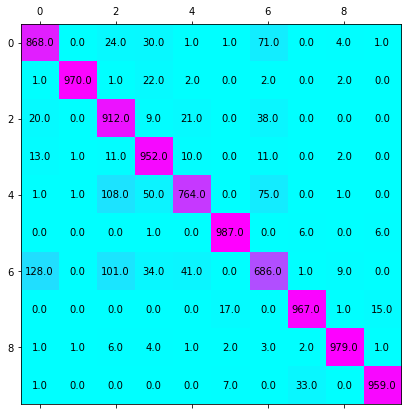

In [22]:
data = confusion_matrix(test_labels, pred2)

fig, ax = plt.subplots(figsize=(10, 7))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='cool')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [23]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 237us/sample - loss: 0.2740 - acc: 0.9044


[0.2739860533237457, 0.9044]

## Saving & Loading the Model

* The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph.
* Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the orginal code.

In [38]:
# saving whole model
# model.save('model')      # SavedModel format
model.save('model.h5')   # The '.h5' extension indicates that the model should be saved to HDF5.

INFO:tensorflow:Assets written to: model\assets


In [41]:
# loading the model
# new_model = tf.keras.models.load_model('model')
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [55]:
# saving only weights
# model.save_weights('model/cp.ckpt')    # SavedModel format
model.save_weights('cp.h5')            # The '.h5' extension indicates that the model should be saved to HDF5.

In [45]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.17770687e-01,  4.51872014e-02, -3.46121788e-02,
            2.25776121e-01,  1.75552547e-01, -1.85922396e+00,
           -1.89003423e-01, -5.85138611e-02, -6.66661739e-01,
           -1.59292948e+00, -3.16694438e-01,  1.42994985e-01,
            1.34967551e-01,  2.49323264e-01, -2.57230103e-01,
           -1.43622726e-01, -1.05462086e+00, -1.20211422e-01,
           -1.05436191e-01,  9.56926495e-02, -7.69770086e-01,
            2.26820588e-01, -1.73231900e-01, -6.90104514e-02,
           -2.64388174e-01,  5.40980995e-02, -1.76668838e-02,
           -2.70245790e-01,  2.26671323e-01,  1.31369308e-02,
           -2.24296167e-01, -2.04090476e-02]],
 
         [[ 2.23400325e-01,  7.31440485e-02,  5.98520972e-02,
           -1.34613484e-01, -9.13945138e-02, -5.60959458e-01,
           -2.43200406e-01, -2.70413935e-01, -2.94907451e-01,
           -1.39703345e+00,  1.60217389e-01, -2.43152633e-01,
         

In [48]:
# loading the weights
new_weighted_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),   # for avoiding overfitting
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])

# new_weighted_model.load_weights('model/cp.ckpt')
new_weighted_model.load_weights('cp.h5')
new_weighted_model.weights

[<tf.Variable 'conv2d_2_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.17770687e-01,  4.51872014e-02, -3.46121788e-02,
            2.25776121e-01,  1.75552547e-01, -1.85922396e+00,
           -1.89003423e-01, -5.85138611e-02, -6.66661739e-01,
           -1.59292948e+00, -3.16694438e-01,  1.42994985e-01,
            1.34967551e-01,  2.49323264e-01, -2.57230103e-01,
           -1.43622726e-01, -1.05462086e+00, -1.20211422e-01,
           -1.05436191e-01,  9.56926495e-02, -7.69770086e-01,
            2.26820588e-01, -1.73231900e-01, -6.90104514e-02,
           -2.64388174e-01,  5.40980995e-02, -1.76668838e-02,
           -2.70245790e-01,  2.26671323e-01,  1.31369308e-02,
           -2.24296167e-01, -2.04090476e-02]],
 
         [[ 2.23400325e-01,  7.31440485e-02,  5.98520972e-02,
           -1.34613484e-01, -9.13945138e-02, -5.60959458e-01,
           -2.43200406e-01, -2.70413935e-01, -2.94907451e-01,
           -1.39703345e+00,  1.60217389e-01, -2.43152633e-01,
     

## Testing a single image

In [24]:
# # custom image path from directory
# img_path = 'ab.jpg'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# img_tensor = tf.keras.preprocessing.image.img_to_array(img)
# img_tensor = img_tensor/255.0

In [25]:
# considering test image
img_tensor = test_images[4]

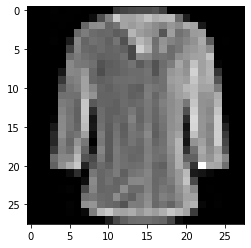

In [26]:
plt.imshow(img_tensor.reshape(28, 28), 'gray')

In [27]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [28]:
model.predict_classes(img_tensor)

array([0], dtype=int64)